# Fetching Images and cooperate with other variables

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time
import requests
import requests_cache
requests_cache.install_cache("kiva")

In [6]:
#Down_sampled data
down = pd.read_csv('/Users/zhanhaochen/Desktop/STA160/downsampled.csv')

In [12]:
down.head()

,Unnamed: 0,index,loan_amount,original_language,description,description_translated,activity_name,sector_name,country_name,town_name,status,id
0,0,27,4475.0,Russian,Vitaliy lives in the city of Melitopol. He is ...,Vitaliy lives in the city of Melitopol. He is ...,Personal Housing Expenses,Housing,Ukraine,Melitopol,expired,1470603
1,1,44,1200.0,English,"Youn, 34, lives with family members in a rural...","Youn, 34, lives with family members in a rural...",Farming,Agriculture,Cambodia,"Ratanakiri province, Borkeo district",expired,1514939
2,2,77,1150.0,English,"Living in a rural area of Battambang province,...","Living in a rural area of Battambang province,...",Farming,Agriculture,Cambodia,"Battambang province, Ratanak Mondul district",expired,1513542
3,3,113,1200.0,English,"Lilia, 57, lives in Danao, Plaridel, Misamis O...",NaN,Fish Selling,Food,Philippines,Plaridel-Danao,expired,446946
4,4,121,300.0,English,Melane is 32 years old and married with three ...,Melane is 32 years old and married with three ...,General Store,Retail,Philippines,"Banga, Aklan",expired,1644432


In [13]:
down.to_csv('down.csv')

In [45]:
down.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150767 entries, 0 to 150766
Data columns (total 12 columns):
Unnamed: 0                150767 non-null int64
index                     150767 non-null int64
loan_amount               150767 non-null float64
original_language         150767 non-null object
description               150767 non-null object
description_translated    127340 non-null object
activity_name             150767 non-null object
sector_name               150767 non-null object
country_name              150767 non-null object
town_name                 137343 non-null object
status                    150767 non-null object
id                        150767 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 13.8+ MB


In [8]:
loans = pd.read_csv('/Users/zhanhaochen/Desktop/STA160/kiva_ds_csv/loans.csv',skiprows = 6)

In [9]:

index = list(down['index'])

In [10]:
down['id'] = loans.loc[index, 'LOAN_ID'].reset_index(drop = True)

In [11]:
down['id'] = [str(i) for i in down['id']]

In [8]:
loans.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,109156,Afolabi,English,Afolabi O. is 35 years old and single. He sell...,NaN,550.0,550.0,funded,321370.0,NaN,...,10.0,20,1,1,NaN,Afolabi,male,true,monthly,field_partner
1,109347,Laura,Spanish,Z. es socia del Banco Comunal Virgen Maria.\nZ...,Z. is a member of Virgen Maria comunal bank. ...,550.0,550.0,funded,321669.0,NaN,...,6.0,18,1,1,NaN,Laura,female,true,monthly,field_partner
2,109490,Betania IV-B Group,English,Betania IV-B is a group of 10 farmers living i...,NaN,3150.0,3150.0,funded,319693.0,NaN,...,14.0,87,4,3,NaN,"Henderina, Margen, Dominggus, Efni, Elias, Fra...","female, male, male, male, male, female, male, ...","true, true, false, true, true, true, true, fal...",bullet,field_partner
3,109570,Ajka,English,Ajka comes from a suburb of the town of Banovi...,NaN,575.0,575.0,funded,322148.0,NaN,...,15.0,22,1,1,NaN,Ajka,female,true,monthly,field_partner
4,109819,Maria Salome,Spanish,La señora Salome pertenece al Banco Comunal “R...,Señora Salome is a member of the Banco Comunal...,500.0,500.0,funded,320794.0,NaN,...,7.0,18,1,1,NaN,Maria Salome,female,true,irregular,field_partner


In [ ]:
#Using server screen 138010
def get_img(loan_id):
    url = 'http://www.kiva.org/img/s300/' + loan_id + '.jpg'
    response = requests.get(url)
    response.raise_for_status()
    with open("/home/hzhan828/kiva/img/{0}.jpg".format(loan_id), 'wb') as f:
        f.write(response.content)

empty_img = []
for i in down['id']:
    try:
        get_img(i)
        time.sleep(0.1)
    except:
        empty_img.append(i)



In [ ]:
all_img_name = glob.glob("/home/hzhan828/kiva/img/*.jpg")

In [133]:
all_img_name

['/Users/zhanhaochen/Desktop/STA141C/img/937802.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/1097530.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/779184.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/923877.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/1091141.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/996772.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/854433.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/1386485.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/564179.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/704621.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/910503.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/780521.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/1186429.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/1229272.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/1076916.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/468025.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/606988.jpg',
 '/Users/zhanhaochen/Desktop/STA141C/img/649047.jpg',
 '/Users/zhanhaochen/D

In [86]:
#Check if all images are fetched from kiva loan image url's.
img_captured = []
#all_img_name = glob.glob("/Users/zhanhaochen/Desktop/STA141C/img/*.jpg") for my PC
all_img_name = glob.glob("/home/hzhan828/kiva/img/*.jpg")
for img in all_img_name:
    img_captured += [int(img.split('/')[-1].rstrip('.jpg'))]


In [112]:
img_captured[:5]

[937802, 1097530, 779184, 923877, 1091141]

In [113]:
down.id = [int(i) for i in down.id]

In [104]:
unique = []
for i in img_captured:
    if i not in unique:
        unique += [i]
    else: print('duplicates: '+str(i))
#No duplicated images.

In [123]:
down_id = list(down['id'])
img_not_captured = []
for i in down_id:
    if i not in img_captured:
        img_not_captured += [i]
    
    

## Taking out uncaptured image data from the down sampled data.

In [141]:
#imgages information missed
len(img_not_captured)

131542

In [148]:
down.iloc[down[down['id'] == 937802].index,:]

,Unnamed: 0,index,loan_amount,original_language,description,description_translated,activity_name,sector_name,country_name,town_name,status,id
1408,1408,41231,5525.0,English,High in the mountains of Western Guatemala lie...,High in the mountains of Western Guatemala lie...,Food Production/Sales,Food,Guatemala,Totonicapan,expired,937802


In [182]:
[down[down['id'] == 937802].index] + [down[down['id'] == 937802].index]

[Int64Index([1408], dtype='int64'), Int64Index([1408], dtype='int64')]

In [185]:
list(down[down['id'] == 937802].index)

[1408]

In [ ]:
new_down = down

In [250]:
removed_indexes = []
for i in img_not_captured:
    indexes = down[down['id'] == i].index
    new_down = new_down.drop(indexes, axis=0)
    removed_indexes += list(indexes)
    
    

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

## Other variables

In [ ]:
#There are 1017 images not captured due to response error. Thus there are now 150767 - 1017 = 149750 rows left

In [249]:
comb_down = np.load('/Users/zhanhaochen/Desktop/STA160/comb_down.npy') #Other variables corresponding to down.csv

In [238]:
comb_down.shape

(150767, 310)

In [241]:
comb_down.index

RangeIndex(start=0, stop=150767, step=1)

In [251]:
comb_down = pd.DataFrame(comb_down)

In [19]:
#Get from server
import pickle
with open('/Users/zhanhaochen/Desktop/STA141C/img_not_captured.pkl', 'rb') as f:
    img_not_captured = pickle.load(f)


In [252]:
removed_indexes = []
for i in img_not_captured:
    indexes = down[down['id'] == i].index
    comb_down = comb_down.drop(indexes, axis=0)
    removed_indexes += list(indexes)

In [243]:
comb_down.shape

(149750, 310)

## Make the captured images follow the same order as down sampled data

In [202]:

all_img_name[0]

'/Users/zhanhaochen/Desktop/STA141C/img/937802.jpg'

In [162]:
down.iloc[0,-1]

1470603

In [173]:
img_captured = np.array(img_captured)

In [170]:
all_img_name = np.array(all_img_name)

In [192]:
new_down = new_down.reset_index(drop = False)

In [ ]:
#down.index should be reset_index first to do this.
img_captured_sorted = []
for index in new_down.index:
    img_captured_sorted += list(all_img_name[new_down.iloc[index,-1] == img_captured])

In [174]:
#Can also do np.where(a == 1), where a is a np.array

(array([0]), array([0]))

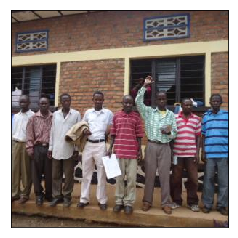

In [198]:
img = cv2.imread(all_img_name[0])
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# Show 50 images each for expired and funded cases.

In [28]:
img_expired = np.load('/Users/zhanhaochen/Desktop/STA141C/img_expired.npy')
img_funded = np.load('/Users/zhanhaochen/Desktop/STA141C/img_funded.npy')

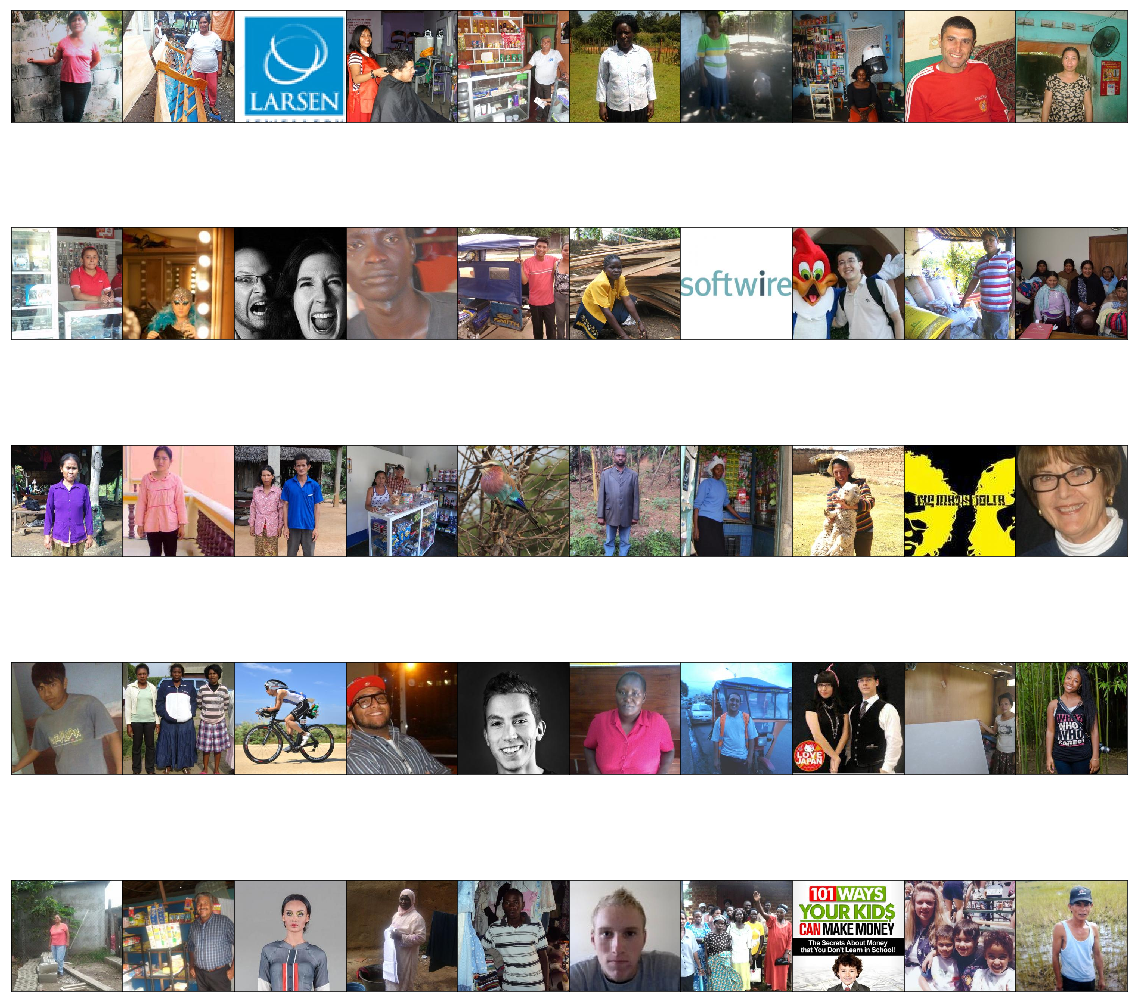

In [86]:
#Expired
fig, ax = plt.subplots(5, 10, figsize = (20,20))
plt.subplots_adjust(hspace=0, wspace=0)

rank = 0
for i in range(5):
    for j in range(10):
        ax[i, j].imshow(img_expired[rank])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        rank += 1
        

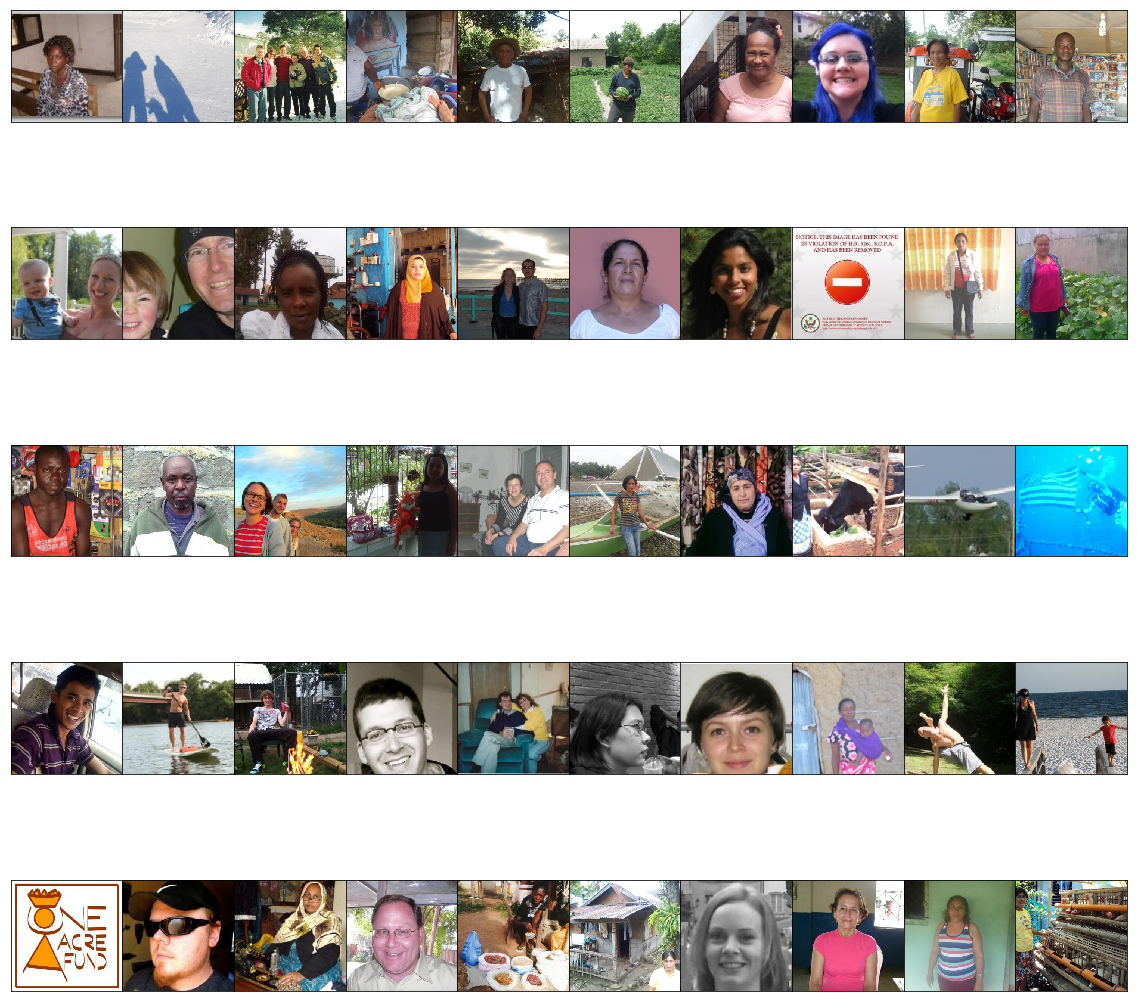

In [87]:
#Funded
fig, ax = plt.subplots(5, 10, figsize = (20,20))
plt.subplots_adjust(hspace=0, wspace=0)

rank = 0
for i in range(5):
    for j in range(10):
        ax[i, j].imshow(img_funded[rank])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        rank += 1

In [90]:
plt.close()

## Change the corresponding test labels.

In [ ]:
with open('/Users/zhanhaochen/Desktop/STA141C/removed_indexes.pkl', 'rb') as f:
    removed_indexes = pickle.load(f)

In [253]:
test_label = np.load('/Users/zhanhaochen/Desktop/STA160/test_label.npy')
test_label = list(test_label)
new_test_label = []
for i in range(150767):
    if i not in removed_indexes:
        new_test_label += [test_label[i]]
        

In [273]:
new_test_label = np.reshape(new_test_label,(149750,1))

In [256]:
sum(new_test_label) / 149750
#49.08% funded satus left

0.49081803005008345

# Read in all data

In [ ]:
new_down = np.load('/Users/zhanhaochen/Desktop/STA141C/newcomb_down.npy')
new_test_label = np.load('/Users/zhanhaochen/Desktop/STA141C/new_test_label.npy')
d2vecs = np.load('/Users/zhanhaochen/Desktop/STA141C/d2vecs.npy')
d2vecs.shape

# Doc2vec

In [22]:
new_doc2vec = []
for i in range(150767):
    if i not in removed_indexes:
        new_doc2vec += [d2vecs[i]]

In [23]:
new_doc2vec = np.array(new_doc2vec)

In [24]:
new_doc2vec.shape

(149750, 300)

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test, d2v_train, d2v_test= train_test_split(new_down, new_test_label,new_doc2vec, test_size = 0.1, random_state = 0)

In [26]:
early_stopping_monitor = EarlyStopping(patience=2)
A1 = Input(shape=(310,),name='A1')

A2 = Dense(512, activation='relu',name='A2')(A1)
A3 = Dense(512, activation='relu',name='A3')(A2)
A4 = Dense(512, activation='relu',name='A4')(A3)
A5 = Dense(256, activation='relu',name='A5')(A4)


B1 = Input(shape=(300,),name='B1')
B2 = Dense(256, activation='relu',name='B2')(B1)
B3 = Dense(64, activation='relu',name='B3')(B2)

merged = Concatenate()([A3,B3])
C1 = Dense(320, activation='relu',name='C1')(merged)

C2 = Dense(160, activation='relu',name='C2')(C1)

C3 = Dense(160, activation='relu',name='C3')(C2)
C4 = Dense(1, activation='sigmoid',name='C4')(C3)
model = Model(inputs=[A1,B1],outputs = C4)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
training = model.fit([X_train,d2v_train], y_train, epochs=20, batch_size=None, validation_split=0.1, 
          verbose=True, callbacks = [early_stopping_monitor])

Train on 121297 samples, validate on 13478 samples
Epoch 1/20
121297/121297 [==============================] - 29s 240us/step - loss: 0.4202 - acc: 0.8100 - val_loss: 0.3945 - val_acc: 0.8229
Epoch 2/20
121297/121297 [==============================] - 29s 240us/step - loss: 0.3815 - acc: 0.8303 - val_loss: 0.3815 - val_acc: 0.8304
Epoch 3/20
121297/121297 [==============================] - 29s 238us/step - loss: 0.3618 - acc: 0.8413 - val_loss: 0.3828 - val_acc: 0.8300
Epoch 4/20
121297/121297 [==============================] - 29s 239us/step - loss: 0.3427 - acc: 0.8496 - val_loss: 0.3793 - val_acc: 0.8317
Epoch 5/20
121297/121297 [==============================] - 29s 240us/step - loss: 0.3234 - acc: 0.8589 - val_loss: 0.3998 - val_acc: 0.8334
Epoch 6/20
121297/121297 [==============================] - 29s 243us/step - loss: 0.3032 - acc: 0.8683 - val_loss: 0.4168 - val_acc: 0.8280


In [27]:
model.evaluate([X_test, d2v_test], y_test)

14975/14975 [==============================] - 1s 38us/step


[0.42164758715287276, 0.8307846410167038]

In [91]:
#np.save('new_d2vecs',new_doc2vec)

# Other variables MLP neural network

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test= train_test_split(new_down, new_test_label, test_size = 0.1, random_state = 0)


In [13]:
from keras.layers import Input, Concatenate, Dense, Embedding, Flatten, LSTM
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)
A1 = Input(shape=(310,),name='A1')

A2 = Dense(512, activation='relu',name='A2')(A1)
A3 = Dense(512, activation='relu',name='A3')(A2)
A4 = Dense(256, activation='relu',name='A4')(A3)

A5 = Dense(128, activation='relu',name='A5')(A4)
A6 = Dense(1, activation='sigmoid',name='A6')(A5)
model = Model(inputs = A1,outputs = A6)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=None, validation_split=0.1, 
          verbose=True, callbacks = [early_stopping_monitor]) 

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 121297 samples, validate on 13478 samples
Epoch 1/20
121297/121297 [==============================] - 22s 182us/step - loss: 0.4249 - acc: 0.8060 - val_loss: 0.4018 - val_acc: 0.8195
Epoch 2/20
121297/121297 [==============================] - 22s 182us/step - loss: 0.3932 - acc: 0.8242 - val_loss: 0.3924 - val_acc: 0.8231
Epoch 3/20
121297/121297 [==============================] - 21s 176us/step - loss: 0.3797 - acc: 0.8301 - val_loss: 0.3978 - val_acc: 0.8236
Epoch 4/20
121297/121297 [==============================] - 22s 181us/step - loss: 0.3689 - acc: 0.8357 - val_loss: 0.3883 - val_acc: 0.8258
Epoch 5/20
121297/121297 [==============================] - 22s 181us/step - loss: 0.3595 - acc: 0.8405 - val_loss: 0.3931 - val_acc: 0.8205
Epoch 6/20
121297/121297 [==============================] - 22s 182us/step - loss: 0.3498 - acc: 0.8448 - val_loss: 0.3985 -

In [14]:
model.evaluate(X_test, y_test)

14975/14975 [==============================] - 0s 31us/step


[0.397671527404817, 0.8243071785832884]

# Read all images in the sorted order.

In [258]:
import cv2
import glob
def get_RGB_img(file):
    img = cv2.imread(file)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img
    
all_img = [get_RGB_img(file) for file in img_captured_sorted]



In [261]:
all_img[0].shape

(300, 300, 3)

In [262]:
all_img = np.array(all_img)

In [263]:
all_img.shape

(19225, 300, 300, 3)

# CNN Keras

In [217]:
from keras.layers import Input, Concatenate, Dense, Embedding, Flatten, LSTM, Conv2D, MaxPool2D, BatchNormalization
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)

In [ ]:
#Output size calculation: O=((I−K+2P)/S)+1 
#I = size of the input eg. 28 * 28, I =28
#K = size of the kernel
#P = size of the zero padding
#S = strides
#padding = "valid", "causal" or "same"  valid to make zero padding
#dilation_rate = 2 cross multiple scales
#strides = 1 to jump over one step
img_rows = all_img.shape[1]
img_cols = all_img.shape[2]

model = Sequential()
model.add(Conv2D(5, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 3),
              padding = 'valid',
              strides = 1,))
model.add(MaxPool2D(2))

model.add(Conv2D(15, kernel_size=2, activation='relu',input_shape=(img_rows, img_cols, 3)))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [ ]:
training = model.fit(all_img, new_test_label, validation_split=0.1, epochs=10,callbacks = [early_stopping_monitor])

model.evaluate(test_data, test_labels, epochs=3)

# Other + Text + Images

In [ ]:
#Deeper conv layer
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='equal'))
# Second convolutional layer

model.add(Conv2D(10, kernel_size=2, activation='relu')
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [ ]:
#Max Pooling to reduce total parameters
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii, jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
model = Sequential()
model.add(Conv2D(5, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 3)))
model.add(MaxPool2D(2))
model.add(Conv2D(15, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1)))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [ ]:
#Get weights for the first kernel in the first layer
conv1 = model.layers[0]
weights1 = conv1.get_weights()
len(weights1)
2
kernels1 = weights1[0]
kernels1.shape
(3, 3, 1, 5) #Third element stands for channel. In this case only one channel(Black and White)
kernel1_1 = kernels1[:, :, 0, 0]
kernel1_1.shape
(3, 3)
plt.imshow(kernel1_1)
test_image = test_data[3, :, :, 0] #Fourth image in the set,all row and all columns,first channel.
plt.imshow(test_image)
filtered_image = convolution(test_image, kernel1_1)
plt.imshow(filtered_image)
#Get sencond kernel in the first layer and see what it did to the original image
kernel1_2 = kernels[:, :, 0, 1]
filtered_image = convolution(test_image, kernel1_2)
plt.imshow(filtered_img)
#each kernel emphasize different parts in the image.


Residual networks  learning residuals
Fully convolutional networks take input img get an output img
Generative adversarial networks